In [5]:
# automatically apply changes in netgen
%load_ext autoreload
%autoreload 2

In [2263]:
from time import sleep
import math
import random
# allows performing command-line operations from within Python
from subprocess import call, Popen

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

# import the netgen
import netgen as ng

In [2360]:
ng.setDirectory("continuous022")

In [2361]:
t           = 0
stim        = 2.52 # 2.9 #
preset_dict = [{'cxd': {'dest': [0, 1], 'mult': [1, 1], 'src': [0, 1]}, #[1.0325, 0.96]
             'cxi': {'dest': [0, 1], 'mult': [1.0, 1.0], 'src': [0, 1]}}]

Choices     =    2
BaseStim    =    [0.00]
Dynamic     =    [30.0]
Start       =    200
popscale    =    0.3

GPiExtEff   =   5.925
STNExtEff   =   1.59
STNExtFreq  =   4.45

CxSTR      =    0.25
CxTh       =    0.015
CxFSI      =    0.2
ThSTR      =    [0.375]
ThCx       =    0.01

sweepcount = ng.configureSweep(0, experiment='mc', preset=preset_dict,
                                Start=Start, popscale=popscale,
                                BaseStim=BaseStim,
                                WrongStim=stim, RightStim=stim,
                                Dynamic=Dynamic,  Choices=Choices,
                                CxSTR=CxSTR, GPiExtEff=GPiExtEff,
                                STNExtEff=STNExtEff, STNExtFreq=STNExtFreq,
                                CxFSI=CxFSI, CxTh=CxTh, ThSTR=ThSTR,
                                ThCx=ThCx, rampingCTX=True)
sweepcount

1

In [2202]:
ng.compileOnly(1,0,sweepcount)

In [2362]:
ng.compileAndRunSweep(8,0,sweepcount)

In [2363]:
results = ng.readAllTrialResults(8,0,sweepcount,['popfreqs','popweights','popQ1s','popQ2s','dopamine', 'popEs'])

In [2364]:
decisions = []
for sn in range(sweepcount):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs2(result)['decisions'])
#decisions

(0, 100)

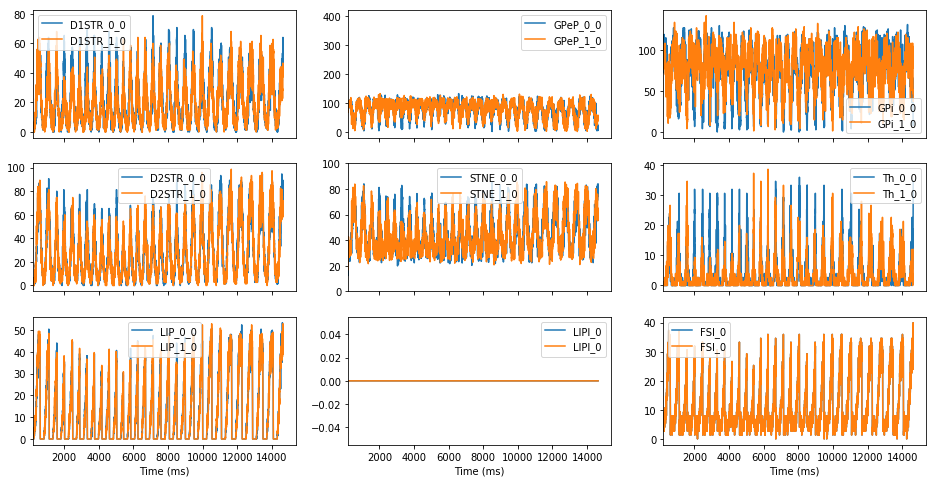

In [2365]:
result = results[0][3]

f, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(16,8), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPeP_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax3[0])
    result['popfreqs'].plot(x='Time (ms)', y='LIPI_0', ax=ax3[1])
    result['popfreqs'].plot(x='Time (ms)', y='FSI'+'_0', ax=ax3[2])

for ax, axx, axxx in zip(ax1, ax2, ax3):
    ax.set_xlim(200, ax.get_xlim()[-1])#(750,900)#
    axx.set_xlim(200, axx.get_xlim()[-1])#(750,900)#
    axxx.set_xlim(200, axxx.get_xlim()[-1])#(750,900)#

ax2[1].set_ylim(0,100)

accuracy overall: 0.8333333333333334
first 15: 0.8666666666666667
everything else: 0.8


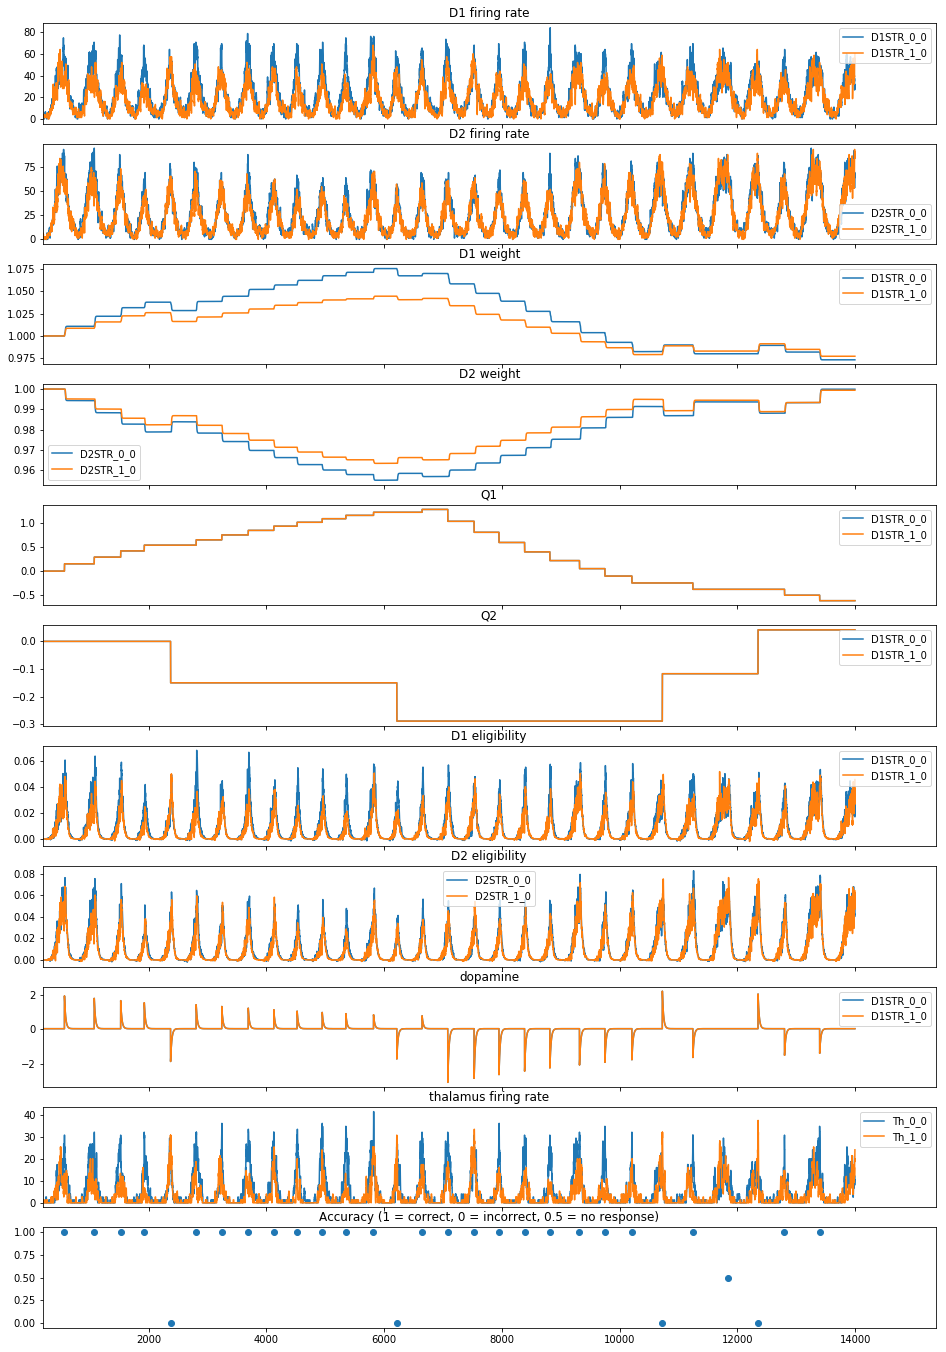

In [2370]:
simnum = 6

result = results[0][simnum]

stagecount = len(decisions[0][0])
reacttimes = []
reactions = []
allreactions = []
for i in range(0, stagecount):
    if decisions[0][simnum][i]['pathvals'] != None and len(decisions[0][simnum][i]['pathvals']) > 0:
        reactions.append(1-decisions[0][simnum][i]['pathvals'][0])
    else:
        reactions.append(0.5)
    reacttimes.append(decisions[0][simnum][i]['time'])
#print(reactions)
#print('accuracy overal: ' + str(np.mean(reactions)))

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11, 1, figsize=(16,24), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1, title='D1 firing rate')
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2, title='D2 firing rate')
    result['popweights'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax3, title='D1 weight')
    result['popweights'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax4, title='D2 weight')
    result['popQ1s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax5, title='Q1')
    result['popQ2s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax6, title='Q2')
    result['popEs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax7, title='D1 eligibility')
    result['popEs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax8, title='D2 eligibility')
    result['dopamine'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax9, title='dopamine')
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax10, title='thalamus firing rate')
    

ax1.set_xlim(200, ax.get_xlim()[-1])#(250,750)#(200, ax.get_xlim()[-1])#(2500,2750)#(200, ax.get_xlim()[-1])#(750,1200)#
ax2.set_xlim(200, ax.get_xlim()[-1])#(250,750)#(200, ax.get_xlim()[-1])#(2500,2750)#(200, ax.get_xlim()[-1])#(750,1200)#(750,1000)#

ax11.plot(reacttimes,reactions, marker='o', linestyle='None')
ax11.set_title('Accuracy (1 = correct, 0 = incorrect, 0.5 = no response)')

#ax3.set_ylim(.995,1.0025)

print('accuracy overall: ' + str(np.mean(reactions)))
print('first 15: ' + str(np.mean(reactions[:15])))
print('everything else: ' + str(np.mean(reactions[15:])))

#plt.savefig('/home/mclapp/Desktop/90_10_prob_feeback.png', dpi=400)

In [2005]:
reacttimes

[507.01254,
 957.04,
 1433.944,
 1928.8231,
 2385.7117,
 2824.6045,
 3307.4866,
 3765.3748,
 4219.4146,
 4676.861,
 5119.2925,
 5538.7017,
 5968.1206,
 6380.523,
 6795.928,
 7242.364,
 7649.761,
 8080.181,
 8498.589,
 8958.037,
 9371.44,
 9794.854,
 10209.258,
 10681.719,
 11107.134,
 11528.545,
 11949.956,
 12369.365,
 12800.786,
 13227.202,
 13666.631,
 14078.032,
 14485.43,
 14922.856,
 15352.275,
 15746.66,
 16192.095,
 16629.32,
 17039.71,
 17455.082,
 17895.355,
 18317.7,
 18734.066,
 19176.332,
 19618.598,
 20043.93,
 20474.242,
 20879.652,
 21324.906,
 21759.203]

In [1630]:
results[0][0]

{'BaseStim': 0.0,
 'Choices': 2,
 'CxFSI': 0.2,
 'CxSTR': 0.25,
 'CxTh': 0.015,
 'Dynamic': 20.0,
 'GPiExtEff': 5.925,
 'RightStim': 2.52,
 'STNExtEff': 1.59,
 'STNExtFreq': 4.45,
 'Start': 200,
 'ThCx': 0.01,
 'ThSTR': 0.2,
 'WrongStim': 2.52,
 'cxd': {'dest': [0, 1], 'mult': [1, 1], 'src': [0, 1]},
 'cxi': {'dest': [0, 1], 'mult': [1.0, 1.0], 'src': [0, 1]},
 'dims': {'brain': 1, 'choices': 2},
 'dopamine':        D1STR_0_0  D1STR_1_0  D2STR_0_0  D2STR_1_0  FSI_0  GPeP_0_0  GPeP_1_0  \
 0       0.199988   0.199988   0.199988   0.199988    0.0       0.0       0.0   
 1       0.199978   0.199978   0.199978   0.199978    0.0       0.0       0.0   
 2       0.199968   0.199968   0.199968   0.199968    0.0       0.0       0.0   
 3       0.199958   0.199958   0.199958   0.199958    0.0       0.0       0.0   
 4       0.199948   0.199948   0.199948   0.199948    0.0       0.0       0.0   
 5       0.199938   0.199938   0.199938   0.199938    0.0       0.0       0.0   
 6       0.199928   0

262.8319831605942

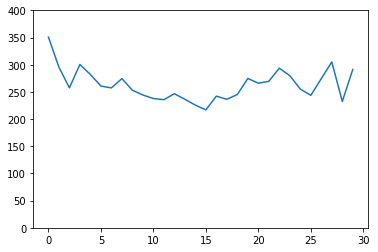

In [2346]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        if decisions[0][j][i]['delay'] != None:
            thesereacts.append(decisions[0][j][i]['delay'])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,400)
np.mean(meanreact)

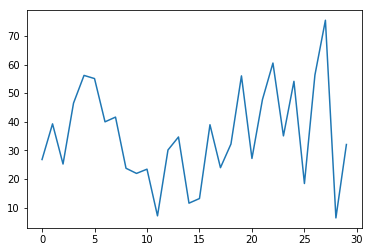

In [2347]:
plt.plot(stdreact)

0.7426984126984129

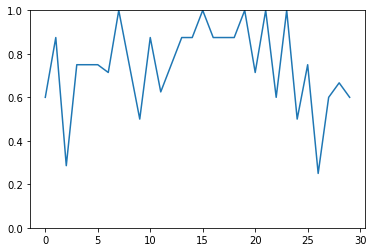

In [2348]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        if decisions[0][j][i]['pathvals'] != None and len(decisions[0][j][i]['pathvals']) > 0:
            thesereacts.append(1-decisions[0][j][i]['pathvals'][0])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i)/math.sqrt(len(i)) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,1)
#plt.plot(upreact)
#plt.plot(lwreact)
np.mean(meanreact)

In [2316]:

np.mean(meanreact[:10])

0.8083333333333332

In [2317]:
np.mean(meanreact[10:])

0.825

In [2235]:
np.mean(meanreact[:1])

0.6